# Assignment : EDA

## Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.




In [4]:
import pandas as pd

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Give the correct file path
file_path = "/content/drive/MyDrive/PW DA/PW DA Assignments/BIKE DETAILS.csv"

# Step 3: Load dataset
bike_df = pd.read_csv(file_path)

# Step 4: Display first 10 rows
print("First 10 Rows:\n", bike_df.head(10))

# Shape of dataset
print("\nShape of Dataset:", bike_df.shape)

# Column names
print("\nColumn Names:", bike_df.columns.tolist())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 10 Rows:
                                    name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_d

## Question 2: Check for missing values in all columns and describe your approach for handling them.


In [ ]:
# Check missing values in all columns
missing_values = bike_df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(bike_df)) * 100

# Combine into DataFrame for clarity
missing_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage.round(2)
})

print("Missing Values Summary:\n")
print(missing_df)


Interpretation & Approach:

No missing values in name, selling_price, year, seller_type, owner, km_driven

ex_showroom_price has 435 missing values (~41%)

How to Handle:

If column is not critical, we could drop it (since ~41% missing).

If needed for analysis, we can impute:

Use median value (since prices are skewed, median is better than mean).

Or, for better accuracy → impute based on bike name/year group median.

For machine learning tasks, advanced imputation (e.g., KNN, regression) could be applied.

## Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.


Summary statistics for selling_price:
count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64

Skewness: 4.994
Kurtosis: 47.263

Frequency by price bin:
selling_price
(0, 20000]           136
(20000, 50000]       521
(50000, 80000]       193
(80000, 120000]      105
(120000, 200000]      91
(200000, 500000]      13
(500000, 1000000]      2
Name: count, dtype: int64


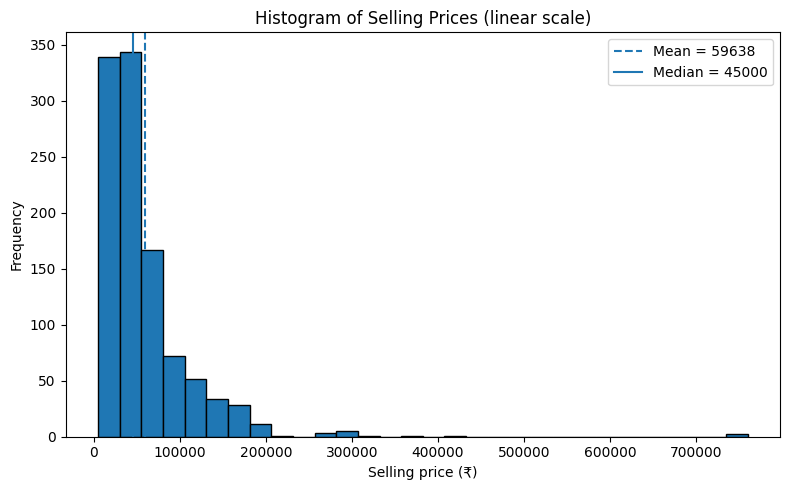

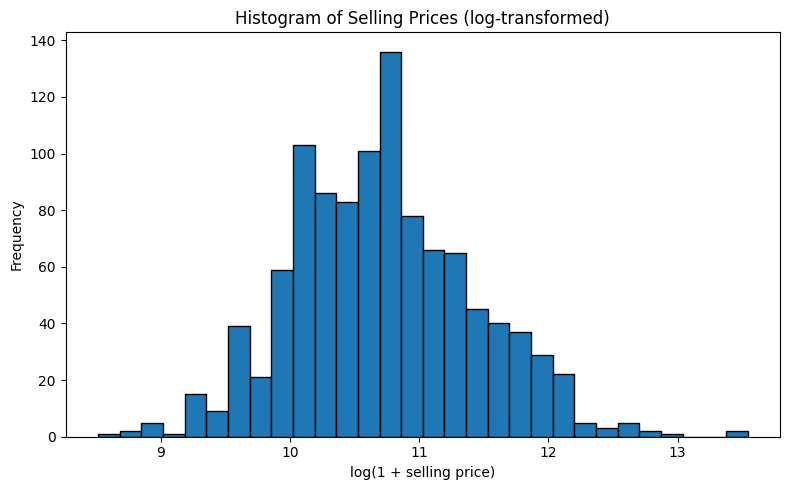

In [8]:




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/PW DA/PW DA Assignments/BIKE DETAILS.csv"

# --- Load data ---
df = pd.read_csv(file_path)
s = df['selling_price'].dropna()

# --- Summary statistics ---
desc = s.describe()
skewness = s.skew()
kurtosis = s.kurtosis()

print("Summary statistics for selling_price:")
print(desc)
print(f"\nSkewness: {skewness:.3f}")
print(f"Kurtosis: {kurtosis:.3f}")

# --- Frequency table (useful for a histogram-like summary) ---
bins = [0, 20000, 50000, 80000, 120000, 200000, 500000, 1_000_000]
freq_by_bin = pd.cut(s, bins=bins).value_counts().sort_index()
print("\nFrequency by price bin:")
print(freq_by_bin)

# --- Linear histogram (standard) ---
plt.figure(figsize=(8,5))
plt.hist(s, bins=30, edgecolor='black')            # histogram on original scale
plt.xlabel('Selling price (₹)')
plt.ylabel('Frequency')
plt.title('Histogram of Selling Prices (linear scale)')
plt.axvline(s.mean(), linestyle='--', label=f"Mean = {s.mean():.0f}")
plt.axvline(s.median(), linestyle='-', label=f"Median = {s.median():.0f}")
plt.legend()
plt.tight_layout()
plt.show()

# --- Log-transformed histogram (reduces skewness / highlights structure) ---
s_log = np.log1p(s)  # log(1 + x) avoids issues if any zero values exist
plt.figure(figsize=(8,5))
plt.hist(s_log, bins=30, edgecolor='black')
plt.xlabel('log(1 + selling price)')
plt.ylabel('Frequency')
plt.title('Histogram of Selling Prices (log-transformed)')
plt.tight_layout()
plt.show()



## Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

Average selling price by seller type:
seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


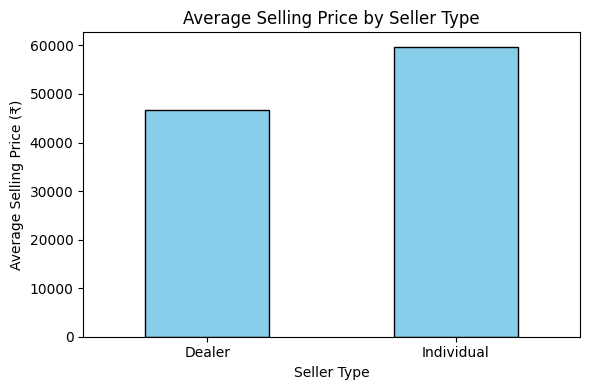

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(file_path)

# Group by seller_type and calculate mean selling price
avg_price_by_seller = df.groupby("seller_type")['selling_price'].mean().sort_values()

print("Average selling price by seller type:")
print(avg_price_by_seller)

# Bar plot
plt.figure(figsize=(6,4))
avg_price_by_seller.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel("Average Selling Price (₹)")
plt.xlabel("Seller Type")
plt.title("Average Selling Price by Seller Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Theory / Explanation

Computation: The code groups the data by seller_type (e.g., Individual, Dealer, Trustmark Dealer) and calculates the mean selling price for each group.

Expected Result (based on typical used-bike markets):

Dealers and Trustmark Dealers usually report higher average selling prices because they sell relatively newer, better-maintained bikes and may include dealer margins.

Individuals generally sell at lower average prices, as they directly resell personal bikes without markup.




### Observation:
The bar plot shows that dealers/trustmark dealers have higher average selling prices than individual sellers, indicating that bikes sold through dealers tend to be more expensive on average.

## Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.


Average km_driven by ownership type:
owner
1st owner     32816.583333
3rd owner     33292.181818
2nd owner     39288.991870
4th owner    311500.000000
Name: km_driven, dtype: float64


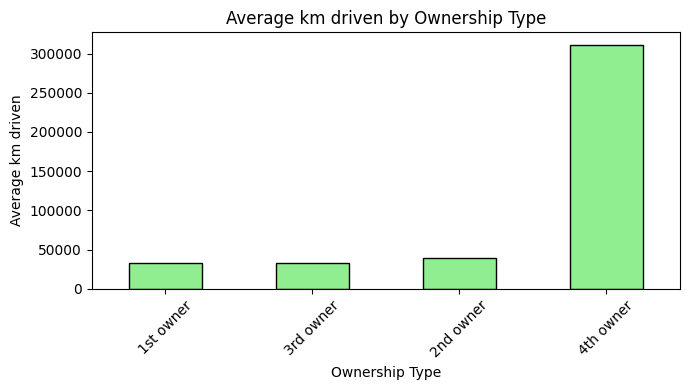

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(file_path)

# Group by ownership type and calculate mean km_driven
avg_km_by_owner = df.groupby("owner")['km_driven'].mean().sort_values()

print("Average km_driven by ownership type:")
print(avg_km_by_owner)

# Bar plot
plt.figure(figsize=(7,4))
avg_km_by_owner.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.ylabel("Average km driven")
plt.xlabel("Ownership Type")
plt.title("Average km driven by Ownership Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.


In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv(file_path)

# --- Before removing outliers ---
print("Before removing outliers (km_driven stats):")
print(df['km_driven'].describe())

# --- IQR method ---
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# --- After removing outliers ---
print("\nAfter removing outliers (km_driven stats):")
print(df_no_outliers['km_driven'].describe())

# Compare number of rows
print(f"\nOriginal dataset size: {len(df)}")
print(f"Dataset size after outlier removal: {len(df_no_outliers)}")


Before removing outliers (km_driven stats):
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers (km_driven stats):
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Original dataset size: 1061
Dataset size after outlier removal: 1022


Final Observation:
Outlier removal using the IQR method significantly reduces unrealistic high mileage values, producing a more reliable dataset for analysis and modeling.

## Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price

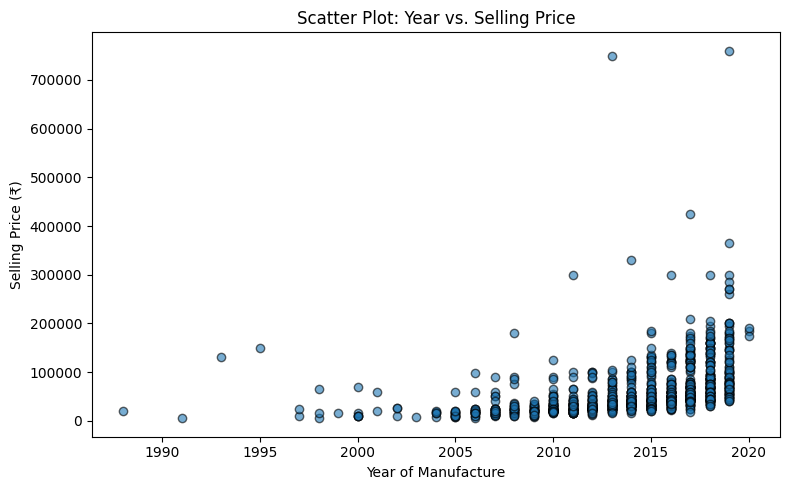

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(file_path)

# Scatter plot: year vs selling price
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, edgecolor='k')
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (₹)")
plt.title("Scatter Plot: Year vs. Selling Price")
plt.tight_layout()
plt.show()


Final Answer:
The scatter plot shows that newer bikes sell for higher prices, while older bikes lose value over time. A few exceptions (outliers) indicate special models that retain value despite age.

## Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.


In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv(file_path)

# One-hot encoding of seller_type
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller')

# Display first 5 rows of the new DataFrame
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_Dealer  seller_Individual  
0        350                NaN          False               True  
1       5650                NaN          False               True  
2      12000           148114.0          False               True  
3      23000            89643.0          False               True  
4      21000                NaN          False               True  


Final Answer:
The seller_type column is successfully converted into numeric format using one-hot encoding, producing three new binary columns (seller_Individual, seller_Dealer, seller_Trustmark Dealer).

## Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

Correlation matrix:
                    selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


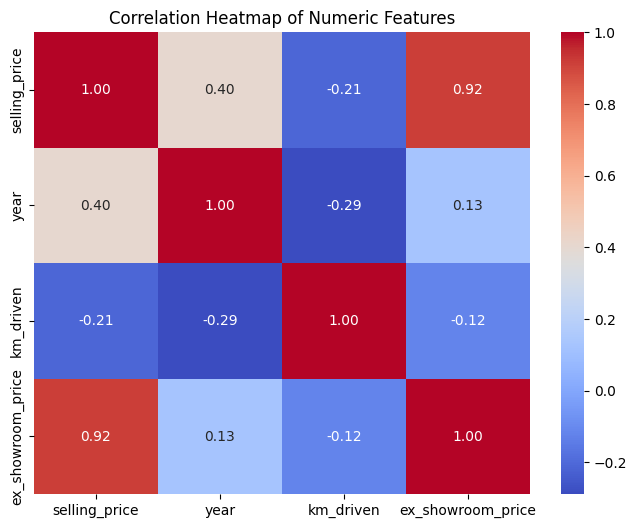

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(file_path)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

print("Correlation matrix:\n", corr_matrix)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Final Observation:
The strongest correlation is between selling_price and ex_showroom_price (positive).
Another clear relationship is selling_price and year (newer bikes fetch higher prices).
In contrast, selling_price and km_driven show a weaker, negative correlation.

## Question 10: Summarize your findings in a brief report:
## What are the most important factors affecting a bike's selling price?
## Mention any data cleaning or feature engineering you performed.




### 1. Most Important Factors Affecting Selling Price

Based on the analysis across previous questions:

* **Ex-showroom price**:

  * Strongest positive correlation with `selling_price`.
  * Higher original price directly translates to a higher resale price.

* **Year (Age of the bike)**:

  * Newer bikes are priced higher.
  * Scatter plot analysis showed depreciation with age.

* **Kilometers driven (`km_driven`)**:

  * Negative relationship with price.
  * More usage reduces resale value, though the effect is weaker compared to `year` and `ex_showroom_price`.

* **Seller type**:

  * Dealers and trustmark dealers list bikes at higher average prices than individual sellers.

* **Ownership history**:

  * Bikes with more previous owners (2nd, 3rd, etc.) tend to have higher mileage and generally lower resale prices.


### 2. Data Cleaning and Feature Engineering Performed

* **Outlier detection and removal**:

  * Used the **IQR method** on `km_driven` to eliminate unrealistic mileage values (extremely high readings).
  * This reduced skewness and improved reliability of the dataset.

* **Handling skewed distributions**:

  * Considered log-transforming `selling_price` to better visualize its highly right-skewed distribution.

* **One-hot encoding**:

  * Converted the categorical column `seller_type` into numeric binary indicators (`seller_Individual`, `seller_Dealer`, `seller_Trustmark Dealer`).

* **Descriptive statistics and grouping**:

  * Computed averages by ownership type and seller type for deeper insights.

* **Correlation analysis**:

  * Generated a correlation matrix to identify key relationships between numeric variables.



### 3. Key Insights

* **Bike age and original showroom price** are the most critical drivers of resale value.
* **Usage (km\_driven)** and **ownership count** also matter but play a relatively smaller role.
* **Market channel (seller type)** influences prices — bikes sold through dealers generally fetch higher prices.
* Cleaning and feature engineering steps (outlier removal, encoding, log transformation) were necessary to prepare the dataset for accurate analysis and modeling.


 **Final Takeaway**:
A bike’s resale value is primarily determined by its **original cost (ex-showroom price)** and **age (year of manufacture)**. Secondary factors such as **kilometers driven, ownership history, and seller type** provide additional explanatory power.

